In [1]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString
import pandas as pd
import matplotlib.pyplot as plt
from   riverlakenetwork import Utility, BurnLakes
from PIL import Image
import os

In [2]:
# ============================================================
# CREATE CATCHMENTS (POLYGONS)
# ============================================================
basin_data = [
    {"COMID": 1, "geometry": Polygon([(-4.0, 4.0), ( 0.0, 4.0), (-2.0, 2.0)])},
    {"COMID": 2, "geometry": Polygon([(-4.0, 4.0), (-2.0, 2.0), (-4.0, 0.0)])},
    {"COMID": 3, "geometry": Polygon([( 0.0, 4.0), ( 0.0, 0.0), (-4.0, 0.0)])},
    {"COMID": 4, "geometry": Polygon([( 0.0, 4.0), ( 4.0, 4.0), ( 2.0, 2.0), ( 0.0, 2.0)])},
    {"COMID": 5, "geometry": Polygon([( 4.0, 4.0), ( 4.0, 0.0), ( 2.0, 0.0), ( 2.0, 2.0)])},
    {"COMID": 6, "geometry": Polygon([( 0.0, 0.0), ( 0.0, 2.0), ( 2.0, 2.0), ( 2.0, 0.0)])},
    {"COMID": 7, "geometry": Polygon([(-4.0, 0.0), (-2.0,-2.0), (-4.0,-4.0)])},
    {"COMID": 8, "geometry": Polygon([(-4.0,-4.0), (-2.0,-2.0), ( 0.0,-4.0)])},
    {"COMID": 9, "geometry": Polygon([( 0.0, 0.0), ( 0.0,-2.0), (-1.0,-1.7), (-1.4,-1.4), (-1.7,-1.0), (-2.0, 0.0)])},
    {"COMID":10, "geometry": Polygon([(-4.0, 0.0), (-2.0, 0.0), (-1.7,-1.0), (-1.4,-1.4), (-1.0,-1.7), ( 0.0,-2.0), ( 0.0,-4.0)])},
    {"COMID":11, "geometry": Polygon([( 0.0, 0.0), ( 2.0, 0.0), ( 2.0,-3.0), ( 0.0,-4.0)])},
    {"COMID":12, "geometry": Polygon([( 2.0, 0.0), ( 4.0, 0.0), ( 4.0,-4.0), ( 2.0,-3.0)])},
    {"COMID":13, "geometry": Polygon([( 0.0,-4.0), ( 2.0,-3.0), ( 4.0,-4.0)])},
]
basins = gpd.GeoDataFrame(basin_data)

# ============================================================
# CREATE RIVERS (LINES)
# ============================================================

river_data = [
    {"COMID": 1, "DOWN": 3, "AREA": 4.00, "geometry": LineString([(-2.0, 3.0), (-2.0, 2.0)])},
    {"COMID": 2, "DOWN": 3, "AREA": 4.00, "geometry": LineString([(-3.0, 2.0), (-2.0, 2.0)])},
    {"COMID": 3, "DOWN":11, "AREA": 8.00, "geometry": LineString([(-2.0, 2.0), ( 0.0, 0.0)])},
    {"COMID": 4, "DOWN": 6, "AREA": 6.00, "geometry": LineString([( 1.0, 3.0), ( 2.0, 2.0)])},
    {"COMID": 5, "DOWN": 6, "AREA": 6.00, "geometry": LineString([( 3.5, 0.5), ( 2.0, 2.0)])},
    {"COMID": 6, "DOWN":11, "AREA": 4.00, "geometry": LineString([( 2.0, 2.0), ( 0.0, 0.0)])},
    {"COMID": 7, "DOWN":-9, "AREA": 4.00, "geometry": LineString([(-3.0,-2.0), (-2.0,-2.0)])},
    {"COMID": 8, "DOWN":-9, "AREA": 4.00, "geometry": LineString([(-2.0,-3.0), (-2.0,-2.0)])},
    {"COMID": 9, "DOWN":11, "AREA": 2.98, "geometry": LineString([(-1.0,-1.0), ( 0.0, 0.0)])},
    {"COMID":10, "DOWN":-9, "AREA": 5.02, "geometry": LineString([(-2.5,-1.0), (-2.0,-2.0)])},
    {"COMID":11, "DOWN":13, "AREA": 7   , "geometry": LineString([( 0.0, 0.0), ( 2.0,-3.0)])},
    {"COMID":12, "DOWN":13, "AREA": 7   , "geometry": LineString([( 3.0,-2.0), ( 2.0,-3.0)])},
    {"COMID":13, "DOWN":-9, "AREA": 2   , "geometry": LineString([( 2.0,-3.0), ( 2.0,-4.0)])},
]
rivers = gpd.GeoDataFrame(river_data)

# ============================================================
# CREATE LAKES (POLYGONS)
# ============================================================

lake_data = [
    {"lake_id": 100, "geometry": Polygon([(-2.5,  2.5), (-1.5,  2.5), (-1.5,  1.5), (-2.5, 1.5)])},
    {"lake_id": 200, "geometry": Polygon([(-0.5, -1.0), (-0.5,  0.0), ( 2.5,  3.0), ( 2.5, 2.0)])},
    {"lake_id": 300, "geometry": Polygon([(-2.5, -1.5), (-1.5, -1.5), (-1.5, -2.5), (-2.5,-2.5)])},
    {"lake_id": 400, "geometry": Polygon([(0.75, 3.25), (1.25, 3.25), (1.25, 2.75), (0.75, 2.75)])},
    {"lake_id": 500, "geometry": Polygon([(3.25,-0.25), (3.75,-0.25), (3.75,-0.75), (3.25,-0.75)])},
]
lakes = gpd.GeoDataFrame(lake_data)

In [3]:
from shapely import affinity

# Factor for compression along y-axis
y_factor = 1.0

# ----------------------------
# Compress basins
# ----------------------------
basins["geometry"] = basins.geometry.apply(lambda g: affinity.scale(g, xfact=1.0, yfact=y_factor, origin=(0,0)))

# ----------------------------
# Compress rivers
# ----------------------------
rivers["geometry"] = rivers.geometry.apply(lambda g: affinity.scale(g, xfact=1.0, yfact=y_factor, origin=(0,0)))

# ----------------------------
# Compress lakes
# ----------------------------
lakes["geometry"] = lakes.geometry.apply(lambda g: affinity.scale(g, xfact=1.0, yfact=y_factor, origin=(0,0)))


In [4]:
# area of cat and length of riv
basins["AREA"] = basins.geometry.area
rivers["LENGTH"] = rivers.geometry.length
lakes["AREA"] = lakes.geometry.area
rivers["AREA"] = basins["AREA"] # pass the information to rivers
rivers = Utility.compute_uparea(rivers, comid_col= 'COMID', next_col = 'DOWN', area_col = 'AREA',out_col = 'UPAREA',)
basins.set_crs("EPSG:4326", inplace=True)
rivers.set_crs("EPSG:4326", inplace=True)
lakes.set_crs("EPSG:4326", inplace=True)


,lake_id,geometry,AREA
0,100,"POLYGON ((-2.5 2.5, -1.5 2.5, -1.5 1.5, -2.5 1...",1.00
1,200,"POLYGON ((-0.5 -1, -0.5 0, 2.5 3, 2.5 2, -0.5 ...",3.00
2,300,"POLYGON ((-2.5 -1.5, -1.5 -1.5, -1.5 -2.5, -2....",1.00
3,400,"POLYGON ((0.75 3.25, 1.25 3.25, 1.25 2.75, 0.7...",0.25
4,500,"POLYGON ((3.25 -0.25, 3.75 -0.25, 3.75 -0.75, ...",0.25


In [5]:
# create the config and pass it to the Burn lake
config = {
    "riv": rivers,
    "riv_dict": {
        "COMID": {"col":"COMID"},
        "NextDownCOMID": {"col":"DOWN"},
        "length": {"col":"LENGTH"},
        "uparea": {"col":"UPAREA","unit":"km2"}
    },
    "cat": basins,
    "cat_dict": {
        "COMID": {"col":"COMID"},
        "unitarea": {"col":"AREA","unit":"km2"},
    },
    "lake": lakes,
    "lake_dict": {
        "LakeCOMID": {"col":"lake_id"},
        "unitarea": {"col":"AREA","unit":"km2"}
    },
}

# burn lakes into river network
bl = BurnLakes(config)


=== Input loader started at : 2025-12-29 00:03:31  ===
riv: Loaded
riv_dict: {'COMID': {'col': 'COMID'}, 'NextDownCOMID': {'col': 'DOWN'}, 'length': {'col': 'LENGTH'}, 'uparea': {'col': 'UPAREA', 'unit': 'km2'}}
cat: Loaded
cat_dict: {'COMID': {'col': 'COMID'}, 'unitarea': {'col': 'AREA', 'unit': 'km2'}}
lake: Loaded
lake_dict: {'LakeCOMID': {'col': 'lake_id'}, 'unitarea': {'col': 'AREA', 'unit': 'km2'}}
=== Input loader finished at: 2025-12-29 00:03:31  ===
=== Input loader took      : 0:00:00.001681  ===========================
=== Input checker started at : 2025-12-29 00:03:31  ===
Subbasin and lake area units are consistent: km2
riv CRS: EPSG:4326
cat CRS: EPSG:4326
lake CRS: EPSG:4326
✅ No loop detected in network topology
=== Input checker finished at: 2025-12-29 00:03:31  ===
=== Input checker took      : 0:00:00.008118  ===========================
=== Resolving lakes started at : 2025-12-29 00:03:31  ===


/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/riverlakenetwork/resolvable_lake_identifier.py:75: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lake_centroids = lake.geometry.centroid
/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/riverlakenetwork/resolvable_lake_identifier.py:501: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  riv["_length_org"] = riv.geometry.length
/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/riverlakenetwork/resolvable_lake_identifier.py:504: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries 

==== Number of lakes after subsetting: 5 ====
==== Number of lakes after removing intersection with only one lake: 3 ====
==== Number of lakes after removing lakes that do not touch starting or ending points of river segments: 3 ====
==== Number of lakes after removing lakes that do touch only one starting or ending points of river segments: 3 ====
==== Number of lakes after removing lakes that do intersect with only one river segment: 3 ====
==== Number of lakes after removing lakes that do have exactly the same uparea for their maximume uparea for various: 3 ====
==== Number of lakes after removing lakes from segments that intersect with more than 3 lakes: 3 ====
==== Number of lakes after identifying the graph number within a lake: 3 ====
=== Resolving lakes finished at: 2025-12-29 00:03:32  ===
=== Resolving lakes took      : 0:00:00.318754  ===========================
=== Network correction started at : 2025-12-29 00:03:32  ===
=== Network correction finished at: 2025-12-29 00:03:

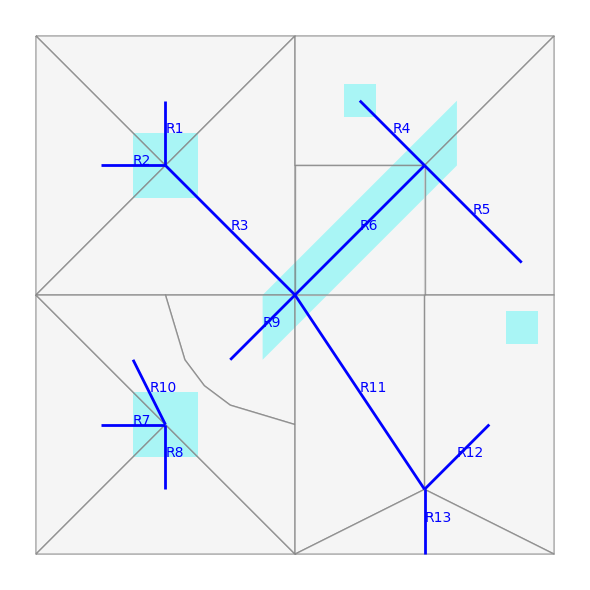

In [6]:
# ============================================================
# PLOT BASINS + RIVERS
# ============================================================

fig, ax = plt.subplots(figsize=(6, 6))

# Plot basins
basins.plot(
    ax=ax,
    facecolor='#F2F2F2',
    edgecolor="grey",
    linewidth=1,
    alpha=0.7,
    zorder=2
)

# Plot rivers
rivers.plot(
    ax=ax,
    color="blue",
    linewidth=2,
    zorder=3
)

# Plot lakes
lakes.plot(
    ax=ax,
    color="cyan",
    linewidth=2,
    zorder=1
)

# Label river COMIDs
for idx, row in rivers.iterrows():
    x, y = row.geometry.interpolate(0.5, normalized=True).xy
    ax.text(
        x[0], y[0],
        f"R{row['COMID']}",
        fontsize=10,
        color="blue",
        zorder=4
    )

#ax.set_title("Basins and River Network")
ax.set_aspect("equal")
ax.axis("off")

# ========== SHOW ==========
plt.tight_layout()
fig.savefig("figure1_a.png", format="png", dpi=1200, bbox_inches='tight')  # very high resolution
plt.show(fig)


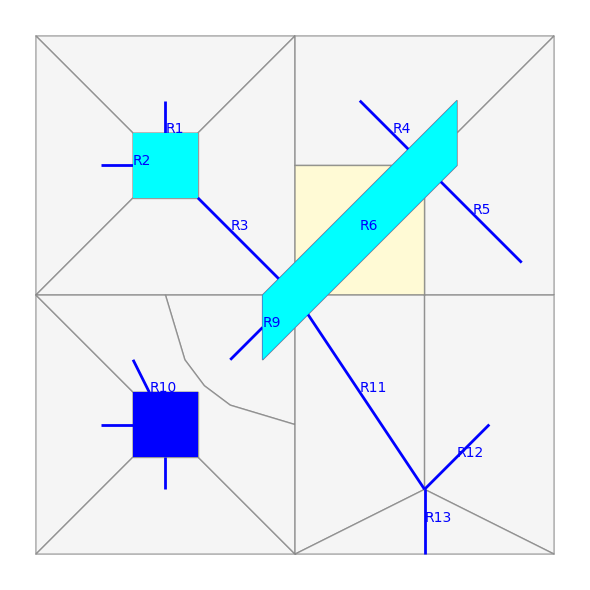

In [7]:
# ============================================================
# PLOT BASINS + RIVERS
# ============================================================

fig, ax = plt.subplots(figsize=(6, 6))


# Plot basins
bl.cat.plot(
    ax=ax,
    facecolor=bl.cat['non_channelized'].map(lambda x: '#FFF9C4' if x==1 else '#F2F2F2'),
    edgecolor="grey",
    linewidth=1,
    alpha=0.7,
    zorder=2
)

# Plot rivers
bl.riv.plot(
    ax=ax,
    color='blue',
    linewidth=2,
    zorder=2.5
)

# Plot lakes
bl.lake.plot(
    ax=ax,
    color=bl.lake['endorheic'].map(lambda x: 'blue' if x==1 else 'cyan'),
    linewidth=2,
    zorder=3
)

# Label river COMIDs
for idx, row in rivers.iterrows():
    x, y = row.geometry.interpolate(0.5, normalized=True).xy
    ax.text(
        x[0], y[0],
        f"R{row['COMID']}",
        fontsize=10,
        color="blue",
        zorder=4
    )

#ax.set_title("Basins and River Network")
ax.set_aspect("equal")
ax.axis("off")

# ========== SHOW ==========
plt.tight_layout()
fig.savefig("figure1_b.png", format="png", dpi=1200, bbox_inches='tight')  # very high resolution
plt.show(fig)


In [8]:
# ----------------------------
# Merge PNGs horizontally
# ----------------------------
png_files = ["figure1_a.png", "figure1_b.png"]
images = [Image.open(png) for png in png_files]

# Calculate total width and height
total_width = sum(img.width for img in images)
total_height = max(img.height for img in images)

# Create a new blank image
merged_image = Image.new('RGB', (total_width, total_height), (255, 255, 255))

# Paste images side by side
x_offset = 0
for img in images:
    merged_image.paste(img, (x_offset, 0))
    x_offset += img.width

# Save the final merged image
merged_image.save("Figure_1.png", dpi=(1200, 1200))

# Remove the original png files
for file in png_files:
    if os.path.exists(file):
        os.remove(file)
        print(f"Removed {file}")
    else:
        print(f"{file} does not exist")

Removed figure1_a.png
Removed figure1_b.png
